<a href="https://colab.research.google.com/github/payal1925/MLnow_2.0-/blob/main/03_LinearRegression/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML_now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


**Author**:
Payal Jaiswal

**Reach out**: [LinkedIn](https://www.linkedin.com/in/payaljaiswal)

[[Course Repository](https://github.com/payal1925/MLnow_2.0-)]

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/student2'

/content/drive/MyDrive/student2


In [3]:
ls

student2-mat.csv  student2-por.csv  univariate_MathData_2.csv
student2-merge.R  student2.txt


In [4]:
import os

In [5]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [6]:
mathData = pd.read_csv('student2-mat.csv', sep=';') #load the csv file as dataframe

In [7]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [8]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [9]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [10]:
ls

student2-mat.csv  student2-por.csv  univariate_MathData_2.csv
student2-merge.R  student2.txt


## Data visualization

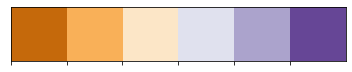

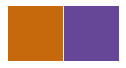

In [11]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [12]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

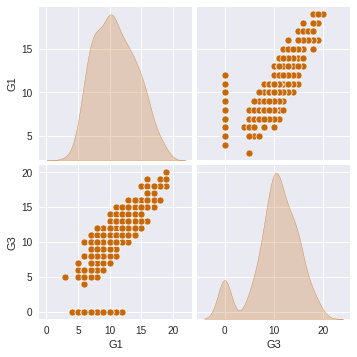

In [13]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [14]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [15]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [16]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [17]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [18]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [19]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [20]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [21]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 24ms/step - loss: 2.8812 - mae: 2.8812 - mse: 11.5686 - val_loss: 2.6394 - val_mae: 2.6394 - val_mse: 9.2981
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 2.7922 - mae: 2.7922 - mse: 11.1362 - val_loss: 2.5365 - val_mae: 2.5365 - val_mse: 8.8487
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 2.7018 - mae: 2.7018 - mse: 10.7204 - val_loss: 2.4375 - val_mae: 2.4375 - val_mse: 8.4397
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 2.6162 - mae: 2.6162 - mse: 10.3571 - val_loss: 2.3381 - val_mae: 2.3381 - val_mse: 8.0615
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 2.5323 - mae: 2.5323 - mse: 10.0324 - val_loss: 2.2397 - val_mae: 2.2397 - val_mse: 7.7183
Epoch 6/300
10/10 [==============================] - 0s 5ms/step - loss: 2.4573 - mae: 2.4573 - mse: 9.7338 - val_loss: 2.1478 - val_mae: 2.1478 - val_mse: 7.4160
Epoch 7/300
10/1

In [22]:
print(history)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


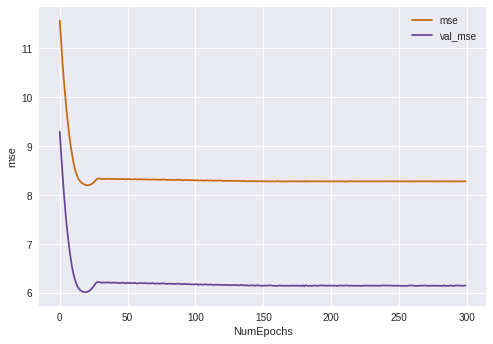

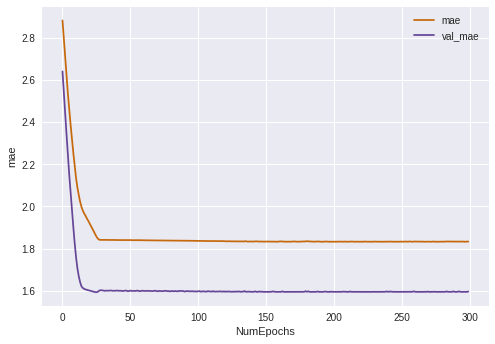

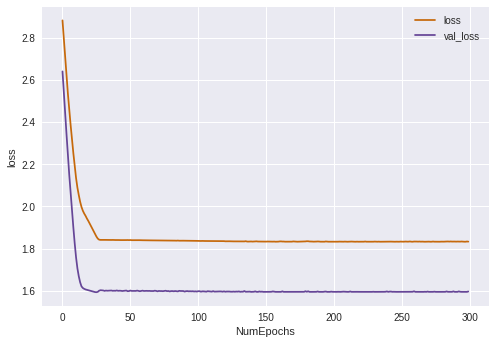

In [24]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [25]:
model.predict([1])

array([[1.0029372]], dtype=float32)

In [26]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0029372]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0029372]
 [2.0031426]
 [3.0033479]
 [4.0035534]
 [5.003759 ]]

List of Predictions (flattened out):
[1.0029372 2.0031426 3.0033479 4.0035534 5.003759 ]



In [27]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [28]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [29]:
print(len(testPreds))
print(testPreds)

79
[14.005607   6.003964  11.004991  17.006224  17.006224  12.005196
 14.005607  19.006634  19.006634   8.0043745 14.005607  13.005402
  8.0043745  7.0041695  9.00458   13.005402  11.004991  16.006018
  7.0041695 10.004786  15.005813  13.005402  14.005607  16.006018
  7.0041695  7.0041695  8.0043745 10.004786  12.005196  10.004786
 12.005196  13.005402  10.004786   6.003964   9.00458   12.005196
  7.0041695  8.0043745 14.005607   9.00458    9.00458    7.0041695
 12.005196   6.003964  13.005402   7.0041695  7.0041695 11.004991
 13.005402  17.006224  12.005196  15.005813   9.00458   12.005196
 15.005813  12.005196  15.005813  12.005196  15.005813  11.004991
 12.005196   8.0043745 16.006018   7.0041695 16.006018  11.004991
 16.006018  13.005402   8.0043745  8.0043745 12.005196  18.006428
 13.005402  16.006018  10.004786   7.0041695 10.004786   7.0041695
 11.004991 ]


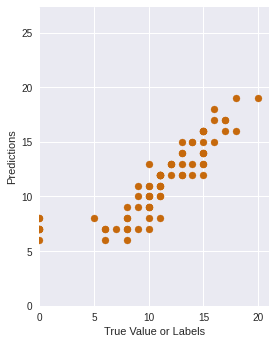

In [30]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

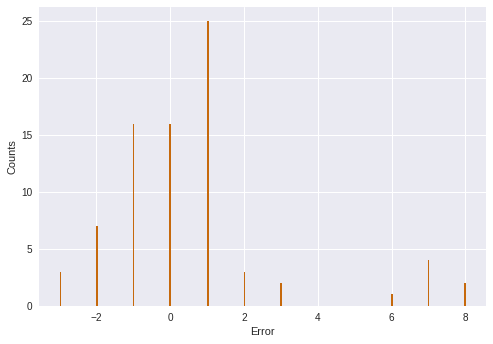

In [31]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions